# Visualisation of Pokemon

The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [archive](https://seaborn.pydata.org/archive.html).  Check your Seaborn version below.

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# see what version of Seaborn you have installed so you can find the right documentation
sns.__version__

'0.11.1'

In [5]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

In [6]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

E:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Attack by Type'}, xlabel='Stat', ylabel='value'>

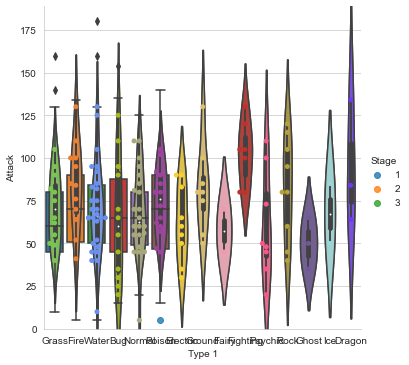

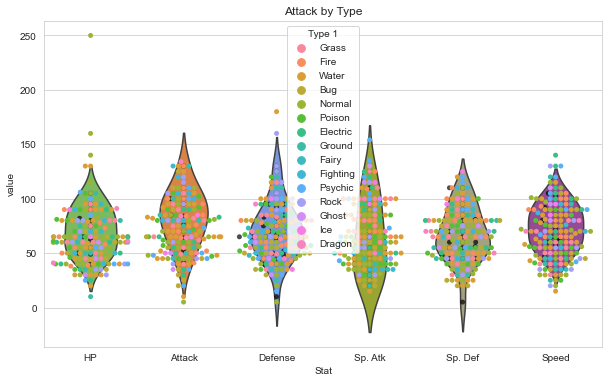

In [19]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,
           hue='Stage')
plt.ylim(0, None)
plt.xlim(0, None)

stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)

sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

pkmn_type_colors = ['#78C850',
                    '#F08030',
                    '#6890F0',
                    '#A8B820',
                    '#A8A878',
                    '#A040A0',
                    '#F8D030',
                    '#E0C068',
                    '#EE99AC',
                    '#C03028',
                    '#F85888',
                    '#B8A038',
                    '#705898',
                    '#98D8D8',
                    '#7038F8',
                   ]
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

plt.figure(figsize=(10,6))
 
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None,
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k',
              alpha=0.7)
 
plt.title('Attack by Type')

melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"],
                    var_name="Stat")
melted_df.head()

sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True,
              palette=pkmn_type_colors)
 
plt.ylim(0, 260)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
corr = stats_df.corr()
 
sns.heatmap(corr)

sns.distplot(df.Attack)

sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
plt.xticks(rotation=-45)

g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
g.set_xticklabels(rotation=-45)

sns.kdeplot(df.Attack, df.Defense)

sns.jointplot(x='Attack', y='Defense', data=df)

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://seaborn.pydata.org/archive/0.10/tutorial/aesthetics.html#seaborn-figure-styles) on that for version 0.10.

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

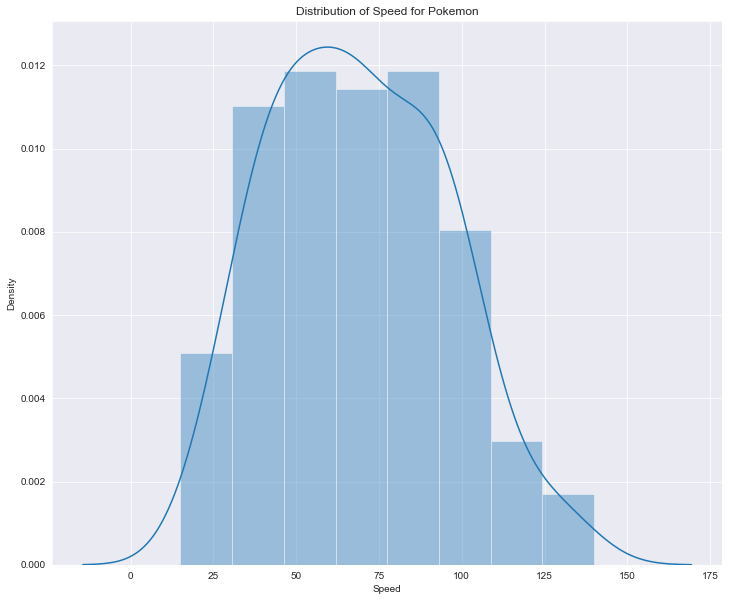

In [22]:
plt.figure(figsize=(12,10))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")